# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [3]:
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger', 'stopwords'])

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
!pip install sqlalchemy

In [5]:
!pip install graphviz

In [6]:
!pip install nltk

In [7]:
!pip install sqlalchemy

In [8]:
# import libraries
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import sqlite3

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sqlalchemy import create_engine
from sklearn.multioutput import MultiOutputClassifier
import graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pickle


In [9]:
y_vars = ['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report']

def load_data():

# load data from database
    conn = sqlite3.connect('DisasterResponsePipelines.db')
    # engine = create_engine('sqlite:///DisasterResponsePipelines.db')
    df = pd.read_sql('SELECT * FROM MainDataFrame',con = conn)
    X = df['message'].values
    y = df[y_vars].values
    return X, y, df.columns

In [ ]:
pd.read_sql('SELECT * FROM MainDataFrame',con = conn).iloc[100]

id                                                                      127
message                   The message might be saying that they have bee...
original                  Bonjou nou nan paldela depi madi menm yon ti d...
genre                                                                direct
related                                                                   1
request                                                                   1
offer                                                                     0
aid_related                                                               1
medical_help                                                              0
medical_products                                                          0
search_and_rescue                                                         0
security                                                                  0
military                                                                  0
child_alone 

In [ ]:
conn = sqlite3.connect('DisasterResponsePipelines.db')

pd.read_sql('SELECT * FROM MainDataFrame',con = conn)['message'].values

array(['Weather update - a cold front from Cuba that could pass over Haiti',
       'Is the Hurricane over or is it not over',
       'Looking for someone but no name', ...,
       "Proshika, operating in Cox's Bazar municipality and 5 other unions, Ramu and Chokoria, assessment, 5 kg rice, 1,5 kg lentils to 700 families.",
       'Some 2,000 women protesting against the conduct of the elections were teargassed as they tried to converge on the local electoral commission offices in the southern oil city of Port Harcourt.',
       'A radical shift in thinking came about as a result of this meeting, recognizing that HIV/AIDS is at the core of the humanitarian crisis and identifying the crisis itself as a function of the HIV/AIDS pandemic.'],
      dtype=object)

### 2. Write a tokenization function to process your text data

In [ ]:
def tokenize(text, lemmatizer=WordNetLemmatizer(), stop_words = stopwords.words('english')):
    
    # remove urls
    
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = text.strip(url_regex)
    
#     normalize
    text = re.sub(r"[a-zA-Z0-9]", " ", text.lower())
    
#     tokenize    
    
    tokens = word_tokenize(text)
    
   
#     lemmatize
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [ ]:
# def model_pipeline():
def build_model():
    pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultiOutputClassifier(RandomForestClassifier(class_weight='balanced')))
    ])
    return pipeline


### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [ ]:
 build_model()

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x7fc414cd9b70>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced')))])

In [ ]:
load_data()

(array(['Weather update - a cold front from Cuba that could pass over Haiti',
        'Is the Hurricane over or is it not over',
        'Looking for someone but no name', ...,
        "Proshika, operating in Cox's Bazar municipality and 5 other unions, Ramu and Chokoria, assessment, 5 kg rice, 1,5 kg lentils to 700 families.",
        'Some 2,000 women protesting against the conduct of the elections were teargassed as they tried to converge on the local electoral commission offices in the southern oil city of Port Harcourt.',
        'A radical shift in thinking came about as a result of this meeting, recognizing that HIV/AIDS is at the core of the humanitarian crisis and identifying the crisis itself as a function of the HIV/AIDS pandemic.'],
       dtype=object),
 array([[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]]),
 Index(['i

In [ ]:
X, y, cols = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y)



model = build_model()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
X[101]

'I live in La Plaine, my wife is pregnant, she got injured by falling blocks. She cannot walk. we have not found anyone to help us. We are in the area called Moya'

In [ ]:
X[100:101]


array(['The message might be saying that they have been stuck in the presidential palace ( pal ) since the same Tuesday ( as the quake ). They need water. The message says they are not finding a little water. No names, no number of people given.'],
      dtype=object)

In [ ]:
model.predict(X[100:101]), y[100]

(array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]]),
 array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]))

In [ ]:
model.predict(X[0:1]), y[0]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [ ]:
def output_report(y_true, y_pred):
    print(
        classification_report(
            y_true[:,1:], 
            np.array([x[1:] for x in y_pred]), 
            target_names=y_vars[:-1]))

In [ ]:
def output_report(y_true, y_pred):
    for i in range(0, len(y_vars)):
        print(y_vars[i])
        
        print(
            classification_report(
                y_true[:, i], y_pred[:, i]))
        

In [ ]:
y_pred.shape, y_test.shape

((6554, 36), (6554, 36))

In [ ]:
output_report(y_test, y_pred)

related
              precision    recall  f1-score   support

           0       0.32      0.28      0.30      1542
           1       0.81      0.59      0.68      4957
           2       0.01      0.31      0.02        55

    accuracy                           0.51      6554
   macro avg       0.38      0.39      0.33      6554
weighted avg       0.69      0.51      0.59      6554

request
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      5449
           1       0.31      0.49      0.38      1105

    accuracy                           0.73      6554
   macro avg       0.60      0.64      0.60      6554
weighted avg       0.79      0.73      0.75      6554

offer
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      6522
           1       0.00      0.12      0.00        32

    accuracy                           0.75      6554
   macro avg       0.50      0.44      0.43      655

### 6. Improve your model
Use grid search to find better parameters. 

In [0]:
parameters = {'vect__ngram_range':[(1,2),(2,2)],
            'clf__estimator__n_estimators':[20, 50]
             }

cv = GridSearchCV(model, parameters, cv=3)

In [0]:
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [0]:
y_pred = cv.predict(X_train)

In [0]:
y_train.shape, y_pred.shape


### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [0]:
output_report(y_train, y_pred)

In [ ]:
parameters = {'vect__ngram_range':[(1,2)],
            'clf__estimator__n_estimators':[149, 150]
             }

cv = GridSearchCV(model, parameters, cv=3)
# cv = GridSearchCV(model, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

# cv.fit(X_train, y_train)
# y_pred = cv.predict(X_test)

output_report(y_test, y_pred)

related
              precision    recall  f1-score   support

           0       0.34      0.35      0.34      1542
           1       0.81      0.61      0.70      4957
           2       0.01      0.22      0.02        55

    accuracy                           0.55      6554
   macro avg       0.39      0.39      0.35      6554
weighted avg       0.70      0.55      0.61      6554

request
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      5449
           1       0.30      0.43      0.36      1105

    accuracy                           0.74      6554
   macro avg       0.59      0.62      0.60      6554
weighted avg       0.78      0.74      0.75      6554

offer
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      6522
           1       0.01      0.12      0.01        32

    accuracy                           0.89      6554
   macro avg       0.50      0.51      0.48      655

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [0]:
def build_model():
    pipeline = Pipeline(['features', FeatureUnion([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ])
        ('clf', MultiOutputClassifier(RandomForestClassifier(class_weight='balanced')))
    ])
    print (pipeline.named_steps['clf'])
    return pipeline


In [0]:

parameters = {'vect__ngram_range':[(1,2)],
            'clf__estimator__n_estimators':[10, 50]
             }

cv = GridSearchCV(model, parameters, cv=3)
cv = GridSearchCV(model, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [0]:
cv.fit(X_train, y_train)

### 9. Export your model as a pickle file

In [0]:
def export_model(cv, filename)
    file = open(filename.pickle, 'wb')
    pickle.dump(cv, file)

In [11]:
conn = sqlite3.connect('DisasterResponsePipelines.db')
# engine = create_engine('sqlite:///DisasterResponsePipelines.db')
df = pd.read_sql('SELECT * FROM MainDataFrame',con = conn)
X = df['message'].values
y = df[y_vars].values


In [12]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y_count = []
for var in y_vars:
    count = df[var].sum()
    y_count.append(count)


In [24]:
!pip install Seaborn

     |████████████████████████████████| 215 kB 3.2 MB/s eta 0:00:01


In [28]:
!pip install Seaborn

In [30]:
import seaborn as sns


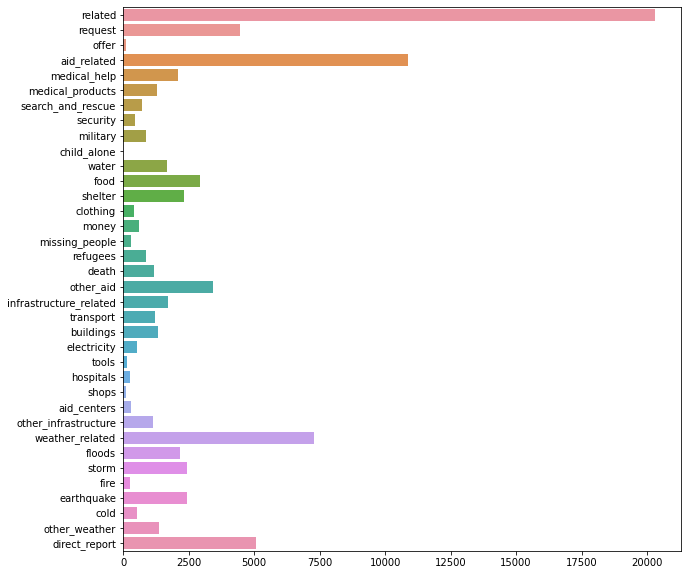

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

sns.barplot(y = y_vars, x = y_count)
plt.title('Category Frequency');

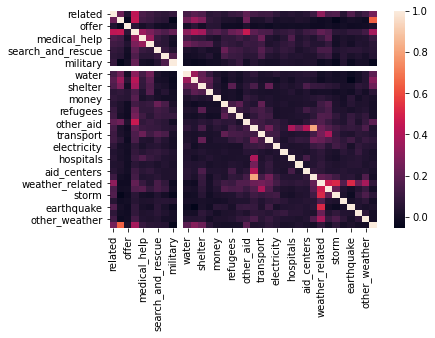

In [65]:
sns.heatmap(df[y_vars].corr())

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.